<a href="https://colab.research.google.com/github/MuskanJam/BharatIntern/blob/main/TitaniceSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset (replace 'titanic.csv' with your dataset file)
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Define features (X) and the target (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
randomforest = RandomForestClassifier()

# Fit the training data
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = randomforest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[89 16]
 [18 56]]


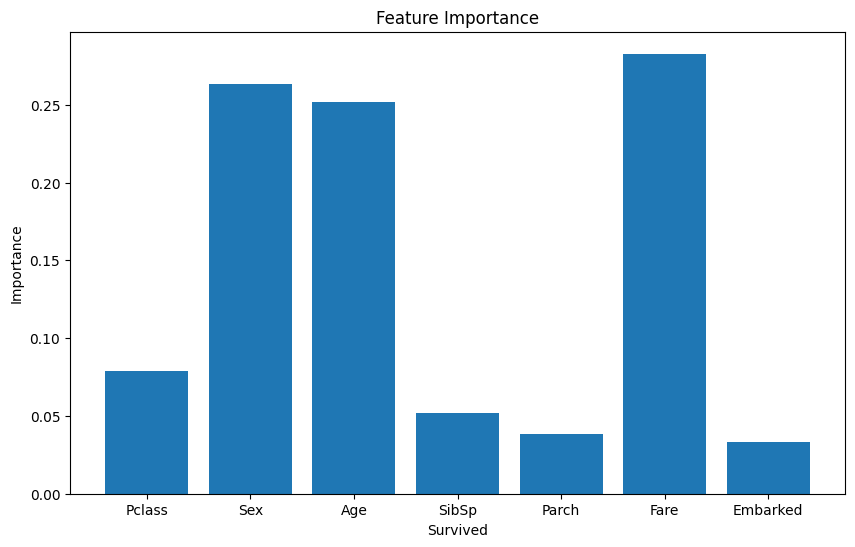

In [5]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = randomforest.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model for predictions
best_randomforest = grid_search.best_estimator_
y_pred = best_randomforest.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (Tuned Model):', accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Tuned Model): 0.8100558659217877


In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(randomforest, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean Accuracy (Cross-Validation):', cv_scores.mean())


Cross-Validation Scores: [0.77653631 0.80898876 0.84831461 0.78651685 0.8258427 ]
Mean Accuracy (Cross-Validation): 0.8092398468394952
